In [2]:
import pandas as pd
import numpy as np
from tensorflow.keras.preprocessing.text import one_hot, Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
from keras.layers import Flatten, Dense, Embedding, LSTM, GRU
import gensim
import spacy 
import nltk 
from sklearn.model_selection import train_test_split
import tensorflow as tf
from keras.layers import Dense, Dropout, Activation, Conv1D, GlobalMaxPooling1D

# Reading Data

In [3]:
from google.colab import drive
drive.mount("/content/gdrive/") 

Mounted at /content/gdrive/


In [4]:
data = pd.read_csv("/content/gdrive/MyDrive/Aim-Tech/cleaned.csv")

In [5]:
data.head()

,id,text,dialect
0,1175358310087892992,لكن بالنهاية ينتفض يغير,IQ
1,1175416117793349632,يعني هذا محسوب على البشر حيونه ووحشيه وتطلب...,IQ
2,1175450108898565888,مبين من كلامه خليجي,IQ
3,1175471073770573824,يسلملي مرورك وروحك الحلوه,IQ
4,1175496913145217024,وين هل الغيبه اخ محمد,IQ


In [6]:
Y = data.dialect
X = data.text

In [7]:
from sklearn.utils import class_weight 
class_weights = class_weight.compute_class_weight(class_weight = 'balanced',
                                                 classes = np.unique(data.dialect),
                                                 y = data.dialect)
class_weights = {i : class_weights[i] for i in range(18)}

In [8]:
from sklearn import preprocessing
Encoder = preprocessing.LabelEncoder()
Y = Encoder.fit_transform(Y)

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, Y,stratify=Y, random_state=42, test_size=0.1, shuffle=True)

In [10]:
from sklearn.feature_extraction.text import TfidfVectorizer
vec = TfidfVectorizer(binary=True,max_features=30000)
tfidf_train = vec.fit_transform(X_train).astype('float16')
tfidf_test = vec.transform(X_test).astype('float16')

In [11]:
model = Sequential() 
model.add(Dense(64,input_shape=(len(vec.get_feature_names()),),activation=tf.keras.layers.LeakyReLU(alpha=.1)))
model.add(Dropout(.3)) 
model.add(Dense(32,activation=tf.keras.layers.LeakyReLU(alpha=.1)))
model.add(Dropout(.3))
model.add(Dense(16,activation=tf.keras.layers.LeakyReLU(alpha=.1)))
model.add(Dropout(.3))

model.add(Dense(18,activation='softmax'))
opt= tf.keras.optimizers.Adam(learning_rate=.0003)
model.compile(loss='sparse_categorical_crossentropy', optimizer=opt, metrics=['accuracy'])
history = model.fit(tfidf_train,y_train,batch_size=512,
                    epochs=15,verbose=1, validation_data=(tfidf_test, y_test),class_weight=class_weights)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


Epoch 1/15


/usr/local/lib/python3.7/dist-packages/tensorflow/python/framework/indexed_slices.py:446: UserWarning: Converting sparse IndexedSlices(IndexedSlices(indices=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape_1:0", shape=(None,), dtype=int32), values=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Reshape:0", shape=(None, 64), dtype=float32), dense_shape=Tensor("gradient_tape/sequential/dense/embedding_lookup_sparse/Cast:0", shape=(2,), dtype=int32))) to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "shape. This may consume a large amount of memory." % value)


806/806 [==============================] - 37s 44ms/step - loss: 2.6647 - accuracy: 0.1573 - val_loss: 2.2346 - val_accuracy: 0.3362
Epoch 2/15
806/806 [==============================] - 25s 27ms/step - loss: 2.2609 - accuracy: 0.2731 - val_loss: 2.0232 - val_accuracy: 0.3759
Epoch 3/15
806/806 [==============================] - 23s 27ms/step - loss: 2.0932 - accuracy: 0.3230 - val_loss: 1.9454 - val_accuracy: 0.3895
Epoch 4/15
806/806 [==============================] - 24s 28ms/step - loss: 1.9953 - accuracy: 0.3536 - val_loss: 1.9052 - val_accuracy: 0.4025
Epoch 5/15
806/806 [==============================] - 23s 27ms/step - loss: 1.9211 - accuracy: 0.3789 - val_loss: 1.8865 - val_accuracy: 0.4077
Epoch 6/15
806/806 [==============================] - 23s 27ms/step - loss: 1.8636 - accuracy: 0.3962 - val_loss: 1.8791 - val_accuracy: 0.4103
Epoch 7/15
806/806 [==============================] - 23s 27ms/step - loss: 1.8134 - accuracy: 0.4105 - val_loss: 1.8754 - val_accuracy: 0.4143
Epo

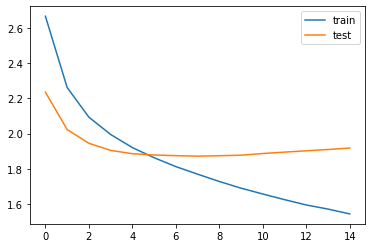

In [12]:
import matplotlib.pyplot as plt  
plt.plot(history.history['loss'], label='train')
plt.plot(history.history['val_loss'], label='test')
plt.legend()
plt.show()

In [13]:
model.save("model.h5")

In [14]:
preds = model.predict(tfidf_test)
class_labels = np.argmax(preds, axis=1) 

              precision    recall  f1-score   support

           0       0.25      0.38      0.30      1737
           1       0.14      0.21      0.16      1685
           2       0.46      0.45      0.45      1674
           3       0.73      0.73      0.73      5736
           4       0.56      0.36      0.44      2418
           5       0.32      0.35      0.33      2513
           6       0.36      0.46      0.40      3226
           7       0.56      0.57      0.57      2721
           8       0.52      0.73      0.61      2597
           9       0.58      0.49      0.53      1354
          10       0.33      0.21      0.26      2896
          11       0.30      0.54      0.38      2420
          12       0.33      0.43      0.38      2404
          13       0.36      0.29      0.32      3383
          14       0.55      0.45      0.50      1769
          15       0.36      0.23      0.28      2569
          16       0.51      0.33      0.40      1431
          17       0.31    

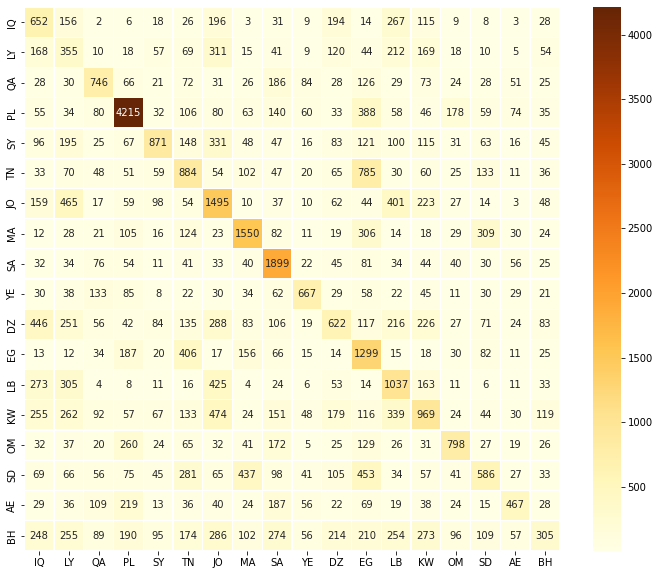

In [15]:
from sklearn.metrics import confusion_matrix
import seaborn
import matplotlib.pyplot as plt
from sklearn.metrics import f1_score,classification_report
labels = data.dialect.unique()
print(classification_report(class_labels,y_test))

plt.figure(figsize=(12,10))
conf = confusion_matrix(class_labels,y_test)

ax = seaborn.heatmap(conf,annot=True, linewidths=.3,cmap='YlOrBr',fmt='d')

ax.set_xticklabels(labels)
ax.set_yticklabels(labels)
plt.show() 

In [16]:
! pip -q install flask_ngrok
! pip -q install flask==0.12.2  
! curl -s https://ngrok-agent.s3.amazonaws.com/ngrok.asc | sudo tee /etc/apt/trusted.gpg.d/ngrok.asc >/dev/null && echo "deb https://ngrok-agent.s3.amazonaws.com buster main" | sudo tee /etc/apt/sources.list.d/ngrok.list && sudo apt update && sudo apt install ngrok   
!ngrok authtoken "267Q98jLmbsnvBRNepE17456zOT_4n72aCdPwH7MjqqG2hXgw"

     |████████████████████████████████| 83 kB 1.3 MB/s 
deb https://ngrok-agent.s3.amazonaws.com buster main
Ign:1 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  InRelease
Ign:2 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  InRelease
Hit:3 https://developer.download.nvidia.com/compute/cuda/repos/ubuntu1804/x86_64  Release
Hit:4 https://developer.download.nvidia.com/compute/machine-learning/repos/ubuntu1804/x86_64  Release
Get:5 https://cloud.r-project.org/bin/linux/ubuntu bionic-cran40/ InRelease [3,626 B]
Get:6 https://ngrok-agent.s3.amazonaws.com buster InRelease [7,470 B]
Get:8 http://security.ubuntu.com/ubuntu bionic-security InRelease [88.7 kB]
Hit:10 http://archive.ubuntu.com/ubuntu bionic InRelease
Hit:11 http://ppa.launchpad.net/c2d4u.team/c2d4u4.0+/ubuntu bionic InRelease
Get:12 http://archive.ubuntu.com/ubuntu bionic-updates InRelease [88.7 kB]
Get:13 https://ngrok-agent.s3.amazonaws.com buster/main amd64 

In [54]:
from flask_ngrok import run_with_ngrok
from flask import Flask,request, render_template, redirect, url_for

app = Flask(__name__, template_folder='/content')
run_with_ngrok(app)
  

@app.route('/', methods=['POST', "GET"])
def form():

    request_method = request.method
    if request.method == "POST":
      text = request.form["tweet"]
      return redirect(url_for("process", tweet=text))
    return render_template("Webpage.html",request_method = request_method)

@app.route("/user/<string:tweet>")
def process(tweet):
    t = pd.Series(tweet)
    sample = vec.transform(t).astype('float16')
    pred = model.predict(sample)
    predd = [(i,j) for i,j in zip(pred[0]*100,data.dialect.unique())]
    predd = sorted(predd, reverse=True)
    print(predd)
    return "your tweet is {} with confidence score= {}".format(predd[0][1],predd[0][0])
  
if __name__ == "__main__":
  app.run()

 * Running on http://127.0.0.1:5000/ (Press CTRL+C to quit)


 * Running on http://450d-34-125-221-75.ngrok.io
 * Traffic stats available on http://127.0.0.1:4040


127.0.0.1 - - [14/Mar/2022 20:34:19] "GET / HTTP/1.1" 200 -
127.0.0.1 - - [14/Mar/2022 20:34:19] "GET /favicon.ico HTTP/1.1" 404 -
127.0.0.1 - - [14/Mar/2022 20:34:45] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [14/Mar/2022 20:34:45] "GET /user/صباح%20الفل%20يا%20باشا HTTP/1.1" 200 -


[(46.940063, 'PL'), (9.994343, 'EG'), (9.730416, 'OM'), (6.981413, 'MA'), (5.9588575, 'AE'), (3.8115983, 'TN'), (3.6438282, 'BH'), (3.5063858, 'SD'), (2.6258435, 'SA'), (1.5355335, 'YE'), (1.4978625, 'QA'), (1.0290047, 'SY'), (0.61464804, 'JO'), (0.58453935, 'LY'), (0.40514037, 'KW'), (0.40467024, 'DZ'), (0.40097478, 'IQ'), (0.33487353, 'LB')]


127.0.0.1 - - [14/Mar/2022 20:35:06] "POST / HTTP/1.1" 302 -
127.0.0.1 - - [14/Mar/2022 20:35:06] "GET /user/يعم%20انا%20قولت%20كدا%20من%20زمان HTTP/1.1" 200 -


[(57.19453, 'PL'), (15.269557, 'EG'), (13.206476, 'OM'), (4.6764116, 'TN'), (4.352979, 'MA'), (1.7619189, 'SD'), (1.0100837, 'SA'), (0.78710157, 'AE'), (0.6491926, 'BH'), (0.4009271, 'QA'), (0.27220342, 'SY'), (0.1041247, 'YE'), (0.10295158, 'JO'), (0.089078896, 'LY'), (0.035651356, 'KW'), (0.03281093, 'DZ'), (0.027061405, 'IQ'), (0.026933264, 'LB')]
